In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '/home/johanna/ICB/annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [65]:
df = mb.bindome.datasets.ProBound.GR_mult_conc()
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [66]:
df

,seq,0,1,batch
0,ATTCCCTTACAACTTCCAAGCGCTTGAAGTGTTTGTTTTGTTTAGG...,0,6,30
1,AAGAAAAATTATTGGCCTTCAGAATACCAAGATCTGTGTTTTCTAA...,0,6,30
2,TAGAAACAGGGTATCTAAATAGTTATTATTTTCTTTCAATGTATAG...,0,6,30
3,CAGCTTTAGACATGCCAGGAGAGTCTTGCTTGCCAAAGACCACAAA...,0,6,30
4,AGACTTCAGGTGGGAGAAACTGGACAATCCATGGCTCTCCCTCCTT...,0,5,300
...,...,...,...,...
492570,CCAGACAGGTCAAAAATCTTACAAAAATGTGATGTGGATAGAAATC...,1,0,300
492571,AAAAGGGGCCTCTCCTAACAACATTCACTTTTCATTTTCATCTTCA...,1,0,3000
492572,CCAGACAGGTAACTCTACTACCGAGATGCATTGCAGGCCTGGGAGA...,1,0,300
492573,AAAAGGGTCATTGTGAGAACCACACTCTTCTGTTCATGTACTCAAT...,1,0,3000


In [67]:
data = df.head(1000)
# data = df.sample(n=10000)

In [68]:
set(data[0])

{0, 1, 2}

In [6]:
n_rounds = 1

In [51]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [69]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, enr_series=True)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 1000


In [35]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [14]:
train.dataset.n_batches

3

next w 20
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.622
Epoch: 21, Loss: -0.622
Epoch: 31, Loss: -0.622
before shift optim.


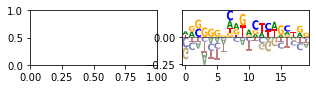

after shift optimz model


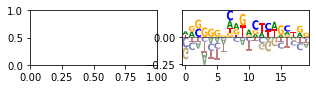


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.623
Epoch: 21, Loss: -0.623
Epoch: 31, Loss: -0.623
before shift optim.


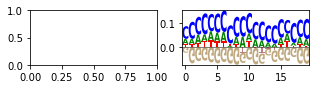

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
-0.6226457953453064 -0.6226328015327454 -0.6226290464401245
after shift optimz model


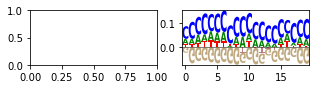


next w 22
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.622
Epoch: 21, Loss: -0.622
Epoch: 31, Loss: -0.622
before shift optim.


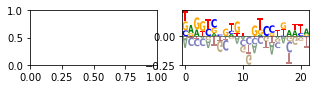

after shift optimz model


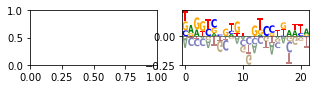


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.623
Epoch: 21, Loss: -0.623
before shift optim.


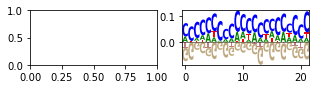

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
-0.6226552128791809 -0.6226403713226318 -0.6226391792297363
after shift optimz model


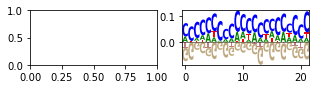


next w 24
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.622
Epoch: 21, Loss: -0.622
Epoch: 31, Loss: -0.622
before shift optim.


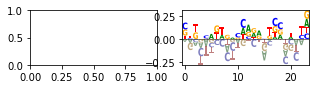

after shift optimz model


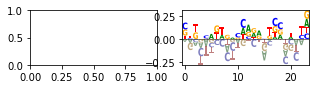


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.623
Epoch: 21, Loss: -0.623
before shift optim.


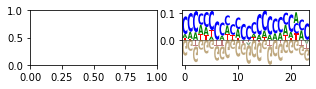

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
-0.6226863861083984 -0.6226710081100464 -0.6226716041564941
after shift optimz model


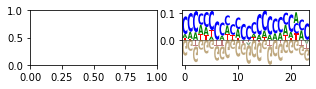


next w 26
kernel to optimize 0
setting kernel at 0 to 1
setting kernel at 1 to 0
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.622
Epoch: 21, Loss: -0.622
Epoch: 31, Loss: -0.622
before shift optim.


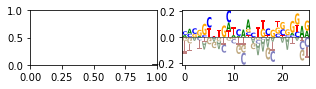

after shift optimz model


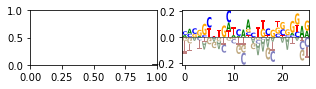


kernel to optimize 1
setting kernel at 0 to 0
setting kernel at 1 to 1
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.622
Epoch: 11, Loss: -0.623
Epoch: 21, Loss: -0.623
before shift optim.


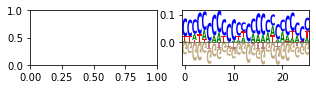

optimize_motif_shift (once)...mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
mono grad 1 None
di grad 1 None
Epoch:  1, Loss: -0.623
Epoch: 11, Loss: -0.623
-0.6226978898048401 -0.6226831674575806 -0.622683584690094
after shift optimz model


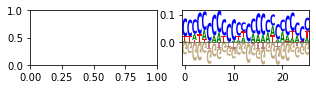

In [70]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=20, max_w=28, n_kernels=2)
# res = []
# model_by_k = {}


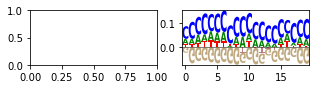

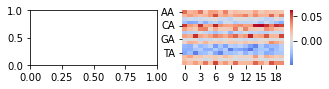

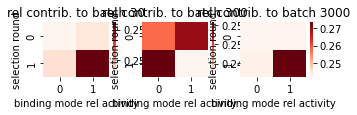

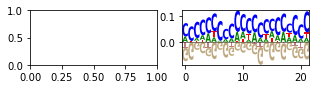

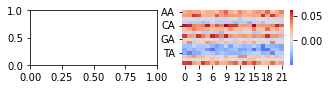

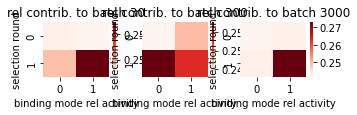

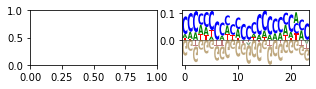

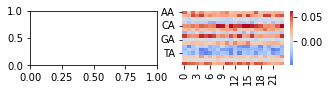

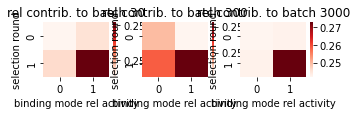

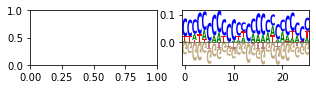

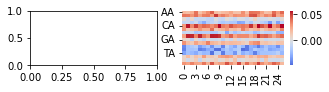

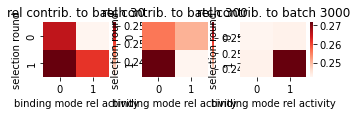

In [73]:
for i in range(20, 28, 2):
    mb.pl.conv_mono(model_by_k_next[str(i)])
    mb.pl.conv_di(model_by_k_next[str(i)])
    mb.pl.plot_activities(model_by_k_next[str(i)], train)